In [1]:
import numpy as np
import pandas as pd

import os

folder_path = '/Users/suka/Downloads/chest_xray'
for dirname, _, filenames in os.walk(folder_path ):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/suka/Downloads/chest_xray/test/PNEUMONIA/person147_bacteria_706.jpeg
/Users/suka/Downloads/chest_xray/test/PNEUMONIA/person100_bacteria_482.jpeg
/Users/suka/Downloads/chest_xray/test/PNEUMONIA/person78_bacteria_382.jpeg
/Users/suka/Downloads/chest_xray/test/PNEUMONIA/person124_bacteria_589.jpeg
/Users/suka/Downloads/chest_xray/test/PNEUMONIA/person1647_virus_2848.jpeg
/Users/suka/Downloads/chest_xray/test/PNEUMONIA/person1675_virus_2891.jpeg
/Users/suka/Downloads/chest_xray/test/PNEUMONIA/person89_bacteria_440.jpeg
/Users/suka/Downloads/chest_xray/test/PNEUMONIA/person35_virus_80.jpeg
/Users/suka/Downloads/chest_xray/test/PNEUMONIA/person122_bacteria_582.jpeg
/Users/suka/Downloads/chest_xray/test/PNEUMONIA/person119_bacteria_565.jpeg
/Users/suka/Downloads/chest_xray/test/PNEUMONIA/person1662_virus_2875.jpeg
/Users/suka/Downloads/chest_xray/test/PNEUMONIA/person85_bacteria_422.jpeg
/Users/suka/Downloads/chest_xray/test/PNEUMONIA/person1669_virus_2884.jpeg
/Users/suka/Downloads/ch

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import pandas as pd
import os

In [3]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data, dtype=object)


In [5]:
train = get_training_data('/Users/suka/Downloads/chest_xray/train')
test = get_training_data('/Users/suka/Downloads/chest_xray/test')
val = get_training_data('/Users/suka/Downloads/chest_xray/val')

<Axes: xlabel='Label', ylabel='count'>

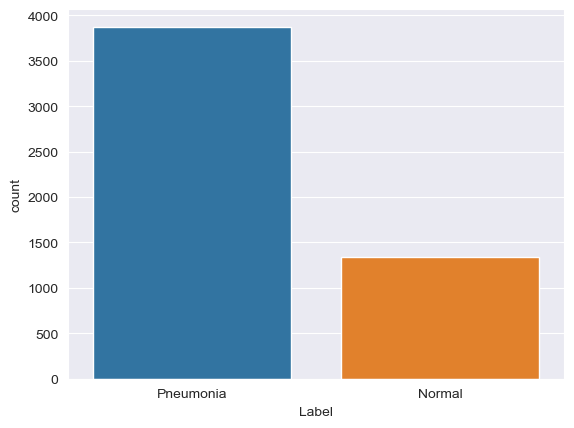

In [6]:
df_train = pd.DataFrame(train, columns=['Image', 'Label'])
label_map = {0: 'Pneumonia', 1: 'Normal'}
df_train['Label'] = df_train['Label'].map(label_map)
sns.set_style('darkgrid')
sns.countplot(data=df_train, x='Label')

Text(0.5, 1.0, 'NORMAL')

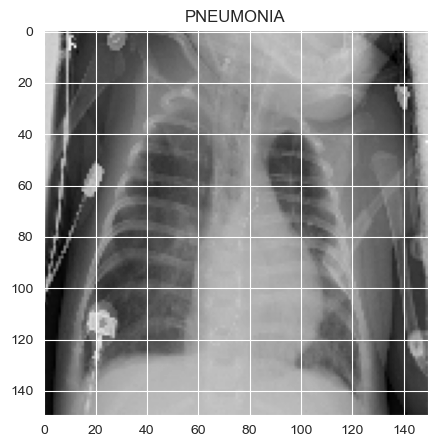

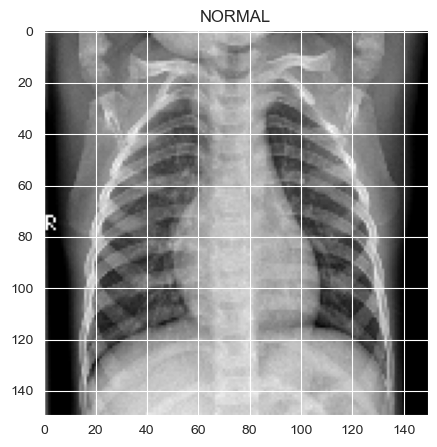

In [7]:
plt.figure(figsize = (5,5))
plt.imshow(train[0][0], cmap='gray')
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0], cmap='gray')
plt.title(labels[train[-1][1]])  

In [8]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

In [9]:
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

In [10]:
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

In [11]:
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,
        featurewise_std_normalization=False, 
        samplewise_std_normalization=False,  
        zca_whitening=False, 
        rotation_range = 30, 
        zoom_range = 0.2, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip = True, 
        vertical_flip=False) 

datagen.fit(x_train)

In [12]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      320       
                                                                 
 batch_normalization (Batch  (None, 150, 150, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 75, 75, 64)        0         
                                                                 
 batch_normalization_1 (Bat  (None, 75, 75, 64)        2

In [13]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

In [14]:
history = model.fit(datagen.flow(x_train,y_train, batch_size = 32) ,epochs = 12 , validation_data = datagen.flow(x_val, y_val) ,callbacks = [learning_rate_reduction])

Epoch 1/12
163/163 [==============================] - 46s 279ms/step - loss: 0.5895 - accuracy: 0.8321 - val_loss: 12.6141 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/12
163/163 [==============================] - 46s 284ms/step - loss: 0.2658 - accuracy: 0.8961 - val_loss: 42.4686 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/12
163/163 [==============================] - ETA: 0s - loss: 0.2379 - accuracy: 0.9139
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
163/163 [==============================] - 48s 292ms/step - loss: 0.2379 - accuracy: 0.9139 - val_loss: 32.2985 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/12
163/163 [==============================] - 48s 294ms/step - loss: 0.1581 - accuracy: 0.9442 - val_loss: 3.9617 - val_accuracy: 0.6875 - lr: 3.0000e-04
Epoch 5/12
163/163 [==============================] - 48s 297ms/step - loss: 0.1378 - accuracy: 0.9509 - val_loss: 0.8649 - val_accuracy: 0.7500 - lr: 3.0000e-04
Epoch 6/12
163/163 [==================

In [15]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

20/20 [==============================] - 1s 64ms/step - loss: 0.3253 - accuracy: 0.9151
Loss of the model is -  0.3253042995929718
20/20 [==============================] - 1s 62ms/step - loss: 0.3253 - accuracy: 0.9151
Accuracy of the model is -  91.50640964508057 %


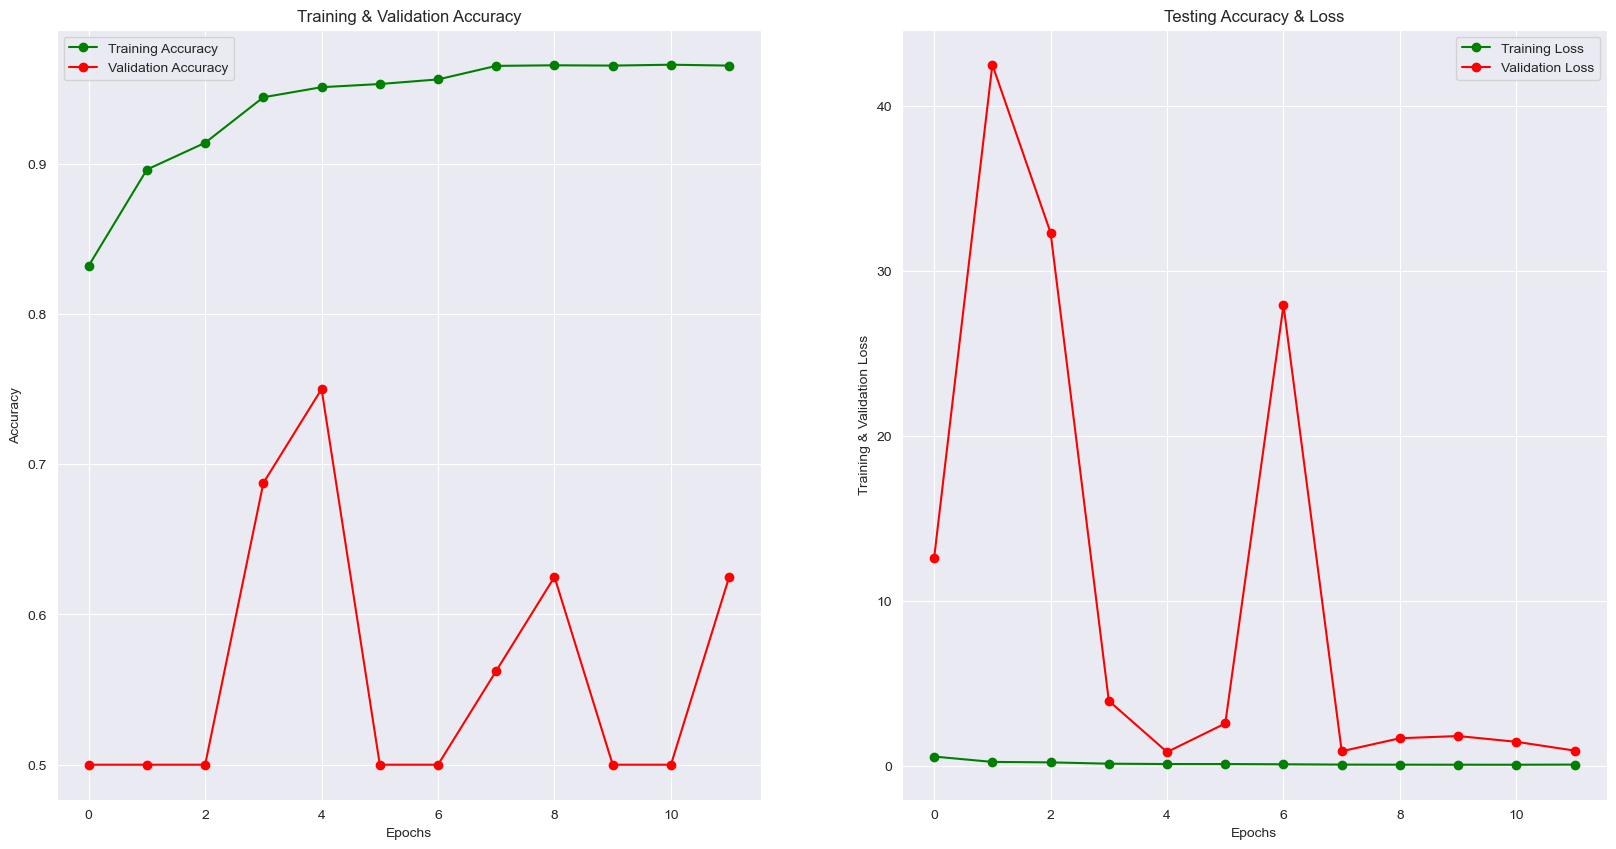

In [16]:
epochs = [i for i in range(12)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [17]:
predictions = model.predict(x_test)
predicted_classes = predictions.argmax(axis=1)
predicted_classes[:15]

20/20 [==============================] - 1s 62ms/step


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [18]:
binary_predictions = (predictions > 0.5).astype(int)
print(classification_report(y_test, binary_predictions, target_names=['Pneumonia (Class 0)', 'Normal (Class 1)']))

                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.92      0.94      0.93       390
   Normal (Class 1)       0.90      0.87      0.88       234

           accuracy                           0.92       624
          macro avg       0.91      0.91      0.91       624
       weighted avg       0.91      0.92      0.91       624



In [19]:
binary_predictions = (predictions > 0.5).astype(int)
cm = confusion_matrix(y_test, binary_predictions)
print(cm)

[[368  22]
 [ 31 203]]


In [20]:
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])

<Axes: >

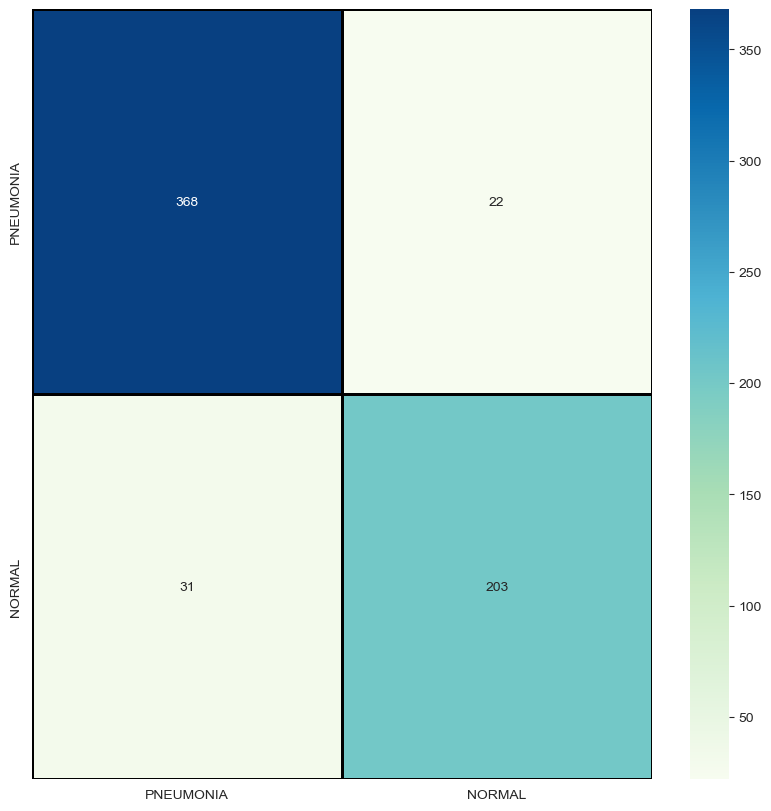

In [21]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "GnBu", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)

In [22]:
correct = np.nonzero(binary_predictions == y_test)[0]
incorrect = np.nonzero(binary_predictions != y_test)[0]

/var/folders/68/tsnvvmp93975ln0bvyr0pb000000gn/T/ipykernel_52047/681850414.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,2,i+1)


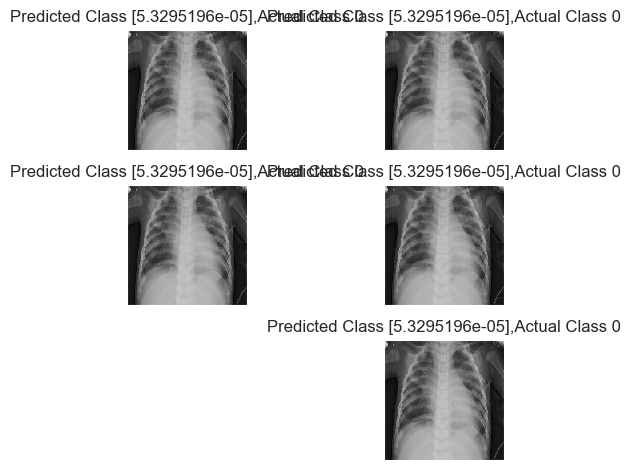

In [23]:
i = 0
for c in correct[:6]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(150,150), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1

/var/folders/68/tsnvvmp93975ln0bvyr0pb000000gn/T/ipykernel_52047/344158187.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,2,i+1)


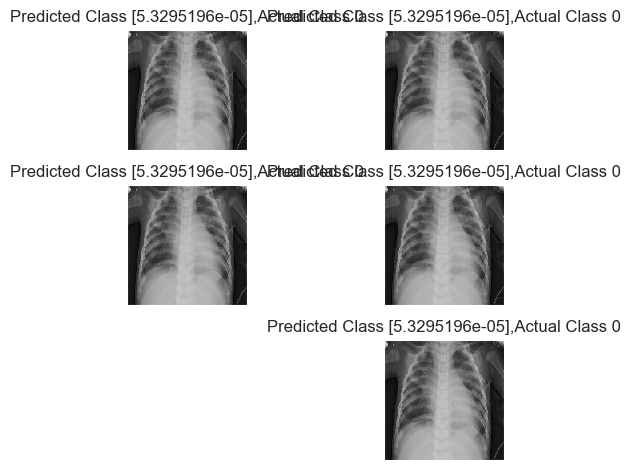

In [24]:
i = 0
for c in incorrect[:6]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(150,150), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1

In [25]:
correct

array([  0,   0,   0, ..., 623, 623, 623])

In [26]:
incorrect.size

181116